In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle

In [9]:
# Load the data
data = pd.read_csv(r"C:\Users\Abhik Goswami\Music\gssoc\predictive-calc\models\retail_sales_forecasting\data\train.csv", parse_dates=['Date'])
data = data[(data['Store'] == 1) & (data['Dept'] == 1)]  # Focusing on one store and department for simplicity

data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
138,1,1,2012-09-28,18947.81,False
139,1,1,2012-10-05,21904.47,False
140,1,1,2012-10-12,22764.01,False
141,1,1,2012-10-19,24185.27,False


In [10]:
# Feature Engineering
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['WeekOfYear'] = data['Date'].dt.isocalendar().week

# Drop unnecessary columns
data.drop(['Date'], axis=1, inplace=True)

# Define features and target
X = data.drop(['Weekly_Sales'], axis=1)
y = data['Weekly_Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Normalize the features
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Reshape y for scaling
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)


In [11]:
# Train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train_scaled.ravel())  # Flatten y for model training

# Predictions
predictions_scaled = model.predict(X_test_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled.reshape(-1, 1))

# Evaluate the model
y_test_actual = scaler_y.inverse_transform(y_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


Root Mean Squared Error: 7547.514401503674
Mean Absolute Error: 3215.8597517241383


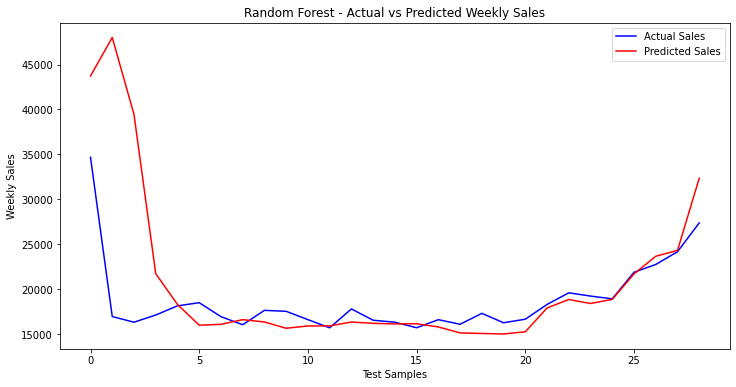

In [12]:
# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, label='Actual Sales', color='blue')
plt.plot(predictions, label='Predicted Sales', color='red')
plt.xlabel("Test Samples")
plt.ylabel("Weekly Sales")
plt.title("Random Forest - Actual vs Predicted Weekly Sales")
plt.legend()
plt.show()

In [14]:
# Save the trained model as model.pkl
model_path = os.path.join(r"C:\Users\Abhik Goswami\Music\gssoc\predictive-calc\models\retail_sales_forecasting\saved_models", "model.pkl")
with open(model_path, "wb") as f:
    pickle.dump(model, f)

# Save the scalers in scaler.pkl
scalers = {'scaler_X': scaler_X, 'scaler_y': scaler_y}
scaler_path = os.path.join(model_folder, "scaler.pkl")
with open(scaler_path, "wb") as f:
    pickle.dump(scalers, f)

FileNotFoundError: [Errno 2] No such file or directory: 'saved_models/model.pkl'